In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import cv2
import numpy as np

# Function to load images from a directory
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
    return images

# Directory containing the images
zalando_dir = '/kaggle/input/zalando-store-crawl/zalando'

# Load images from each subdirectory
hoodies_images = load_images_from_directory(os.path.join(zalando_dir, 'hoodies'))
hoodies_female_images = load_images_from_directory(os.path.join(zalando_dir, 'hoodies-female'))
longsleeve_images = load_images_from_directory(os.path.join(zalando_dir, 'longsleeve'))
shirt_images = load_images_from_directory(os.path.join(zalando_dir, 'shirt'))
sweatshirt_images = load_images_from_directory(os.path.join(zalando_dir, 'sweatshirt'))
sweatshirt_female_images = load_images_from_directory(os.path.join(zalando_dir, 'sweatshirt-female'))

# Display the number of images loaded from each directory
print("Number of hoodies images:", len(hoodies_images))
print("Number of hoodies female images:", len(hoodies_female_images))
print("Number of longsleeve images:", len(longsleeve_images))
print("Number of shirt images:", len(shirt_images))
print("Number of sweatshirt images:", len(sweatshirt_images))
print("Number of sweatshirt female images:", len(sweatshirt_female_images))


Number of hoodies images: 2143
Number of hoodies female images: 1209
Number of longsleeve images: 1699
Number of shirt images: 4789
Number of sweatshirt images: 3885
Number of sweatshirt female images: 2455


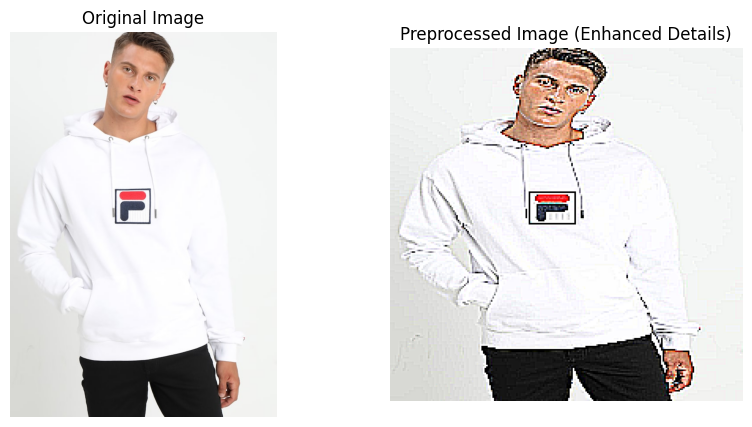

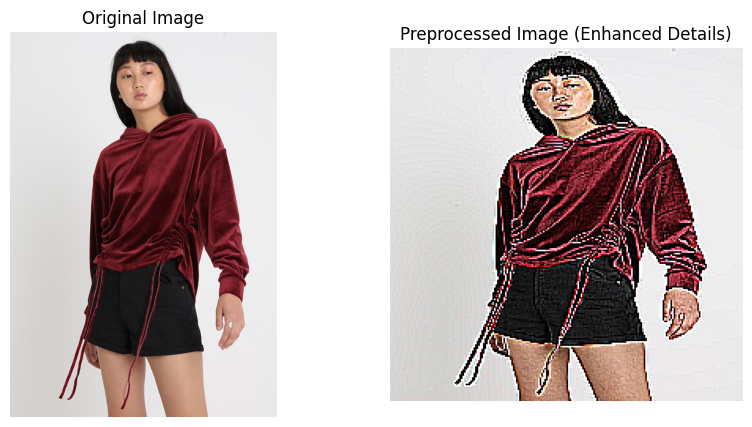

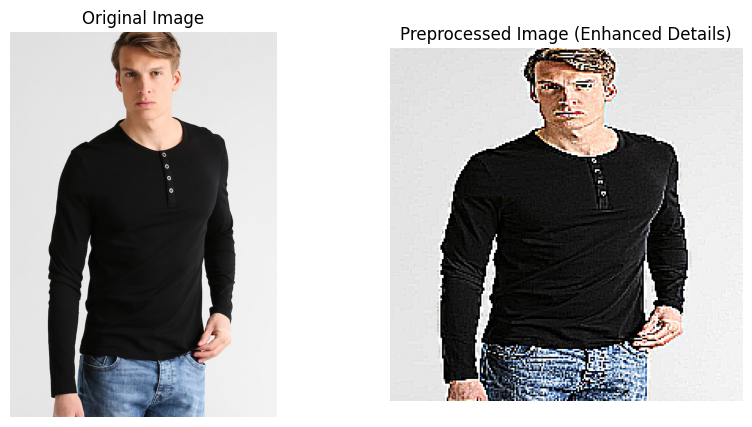

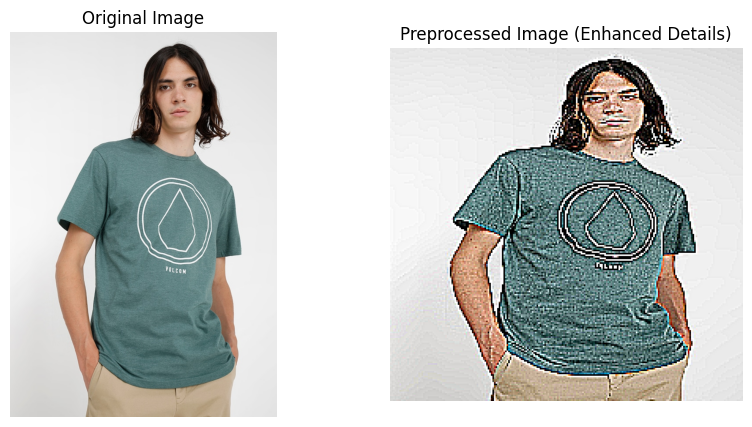

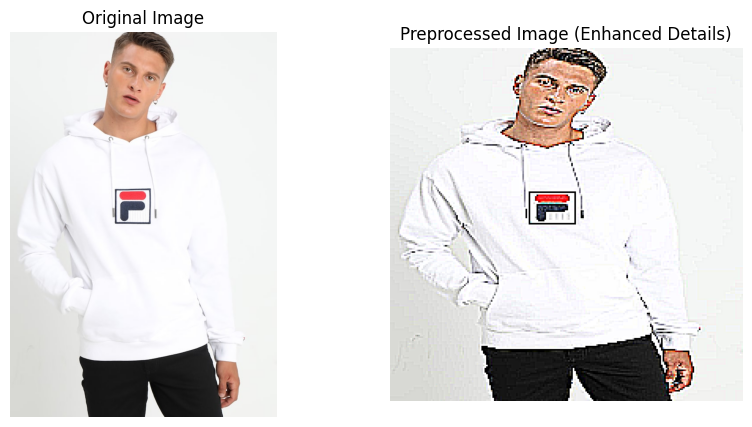

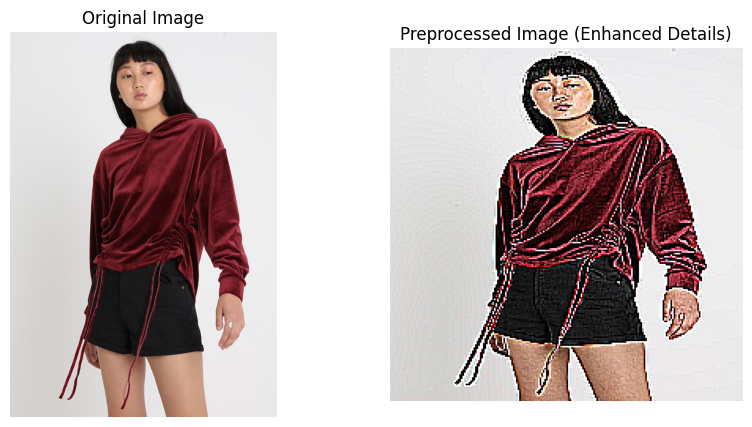

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define input directory
input_dir = "/kaggle/input/zalando-store-crawl/zalando"

# Define classes
classes = ["hoodies", "hoodies-female", "longsleeve", "shirt", "sweatshirt", "sweatshirt-female"]

# Function to preprocess an image
def preprocess_image(image):
    # Resize image to 224x224 pixels
    resized_image = cv2.resize(image, (224, 224))

    # Normalize pixel values to range [0, 1]
    normalized_image = resized_image.astype(np.float32) / 255.0

    # Enhance details
    sharpened_image = cv2.filter2D(resized_image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))  # Sharpening

    return resized_image, normalized_image, sharpened_image

# Loop through each class and preprocess one image from each class
for class_name in classes:
    class_dir = os.path.join(input_dir, class_name)

    # Get list of image files for the current class
    image_files = [filename for filename in os.listdir(class_dir) if filename.endswith(('.png', '.jpg', '.jpeg'))]

    # Process one original and preprocessed image from each class
    for filename in image_files[:1]:
        # Read original image
        img_path = os.path.join(class_dir, filename)
        original_image = cv2.imread(img_path)

        # Preprocess image
        resized_image, normalized_image, sharpened_image = preprocess_image(original_image)

        # Plot original and preprocessed images
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        axes[0].set_title("Original Image")
        axes[0].axis("off")
        axes[1].imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
        axes[1].set_title("Preprocessed Image (Enhanced Details)")
        axes[1].axis("off")
        plt.show()
# here central weights are given more imp

In [46]:
import shutil

# Function to clear the output directory
def clear_output_directory(directory):
    # Check if the directory exists
    if os.path.exists(directory):
        # Delete the directory and its contents recursively
        shutil.rmtree(directory)
        print(f"Output directory '{directory}' and its contents have been cleared.")
    else:
        print(f"Output directory '{directory}' does not exist.")

# Call the function to clear the output directory
clear_output_directory(output_dir)


Output directory '/kaggle/working/hoodies' does not exist.


**First dataset(resized->normalized->sharpened(weighted center pixel)->cropped->saved**

In [47]:
import os
import cv2
import numpy as np
import shutil

# Define input directory
input_dir = "/kaggle/input/zalando-store-crawl/zalando"
# Define output directory
output_dir = "/kaggle/working//preprocessed_images"

# Define classes
classes = ["hoodies", "hoodies-female", "longsleeve", "shirt", "sweatshirt", "sweatshirt-female"]

# Create output directories for each class
for class_name in classes:
    os.makedirs(os.path.join(output_dir, class_name), exist_ok=True)

# Function to preprocess an image
def preprocess_image(image):
    # Resize image to 224x224 pixels
    resized_image = cv2.resize(image, (224, 224))

    # Normalize pixel values to range [0, 1]
    normalized_image = resized_image.astype(np.float32) / 255.0

    # Enhance details
    sharpened_image = cv2.filter2D(resized_image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))  # Sharpening

    return resized_image, normalized_image, sharpened_image

# Loop through each class and preprocess 300 images in each class
for class_name in classes:
    class_dir = os.path.join(input_dir, class_name)
    output_class_dir = os.path.join(output_dir, class_name)

    # Get list of image files for the current class
    image_files = [filename for filename in os.listdir(class_dir) if filename.endswith(('.png', '.jpg', '.jpeg'))]

    # Process 300 images in the current class
    for filename in image_files[:300]:
        # Read original image
        img_path = os.path.join(class_dir, filename)
        original_image = cv2.imread(img_path)

        # Preprocess image
        _, _, sharpened_image = preprocess_image(original_image)
        cropped_image = sharpened_image[40:, :]

        # Save preprocessed image
        output_img_path = os.path.join(output_class_dir, filename)
        cv2.imwrite(output_img_path, cropped_image)

        print(f"Preprocessed image saved: {output_img_path}")


Preprocessed image saved: /kaggle/working//preprocessed_images/hoodies/1FI22S017-A11@10.jpg
Preprocessed image saved: /kaggle/working//preprocessed_images/hoodies/H0422S028-Q11@12.1.jpg
Preprocessed image saved: /kaggle/working//preprocessed_images/hoodies/2NA22S0BQ-M12@1.1.jpg
Preprocessed image saved: /kaggle/working//preprocessed_images/hoodies/NE322S00W-C11@11.jpg
Preprocessed image saved: /kaggle/working//preprocessed_images/hoodies/WR122S00J-M11@8.jpg
Preprocessed image saved: /kaggle/working//preprocessed_images/hoodies/OS322S0B2-Q11@10.jpg
Preprocessed image saved: /kaggle/working//preprocessed_images/hoodies/TOB22S014-M11@10.jpg
Preprocessed image saved: /kaggle/working//preprocessed_images/hoodies/UR622S02A-Q11@10.jpg
Preprocessed image saved: /kaggle/working//preprocessed_images/hoodies/M0M22S03U-Q11@2.1.jpg
Preprocessed image saved: /kaggle/working//preprocessed_images/hoodies/HO022S00B-K11@8.jpg
Preprocessed image saved: /kaggle/working//preprocessed_images/hoodies/AD122S0

**2nd dataset**

here we have used unsharp masking


In [55]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define input directory
input_dir = "/kaggle/input/zalando-store-crawl/zalando"
output_dir="/kaggle/working/pre"

# Define classes
classes = ["hoodies", "hoodies-female", "longsleeve", "shirt", "sweatshirt", "sweatshirt-female"]
for class_name in classes:
    os.makedirs(os.path.join(output_dir, class_name), exist_ok=True)
# Function to preprocess an image with enhancement techniques
def enhance_image(image):
    # Apply histogram equalization for contrast enhancement

    
    # Apply unsharp masking for sharpening
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)
    
    return  sharpened_image

# Loop through each class and preprocess one image from each class
for class_name in classes:
    class_dir = os.path.join(input_dir, class_name)
    output_class_dir = os.path.join(output_dir, class_name)

    # Get list of image files for the current class
    image_files = [filename for filename in os.listdir(class_dir) if filename.endswith(('.png', '.jpg', '.jpeg'))]

    # Process one original and preprocessed image from each class
    for filename in image_files[:300]:
        # Read original image
        img_path = os.path.join(class_dir, filename)
        original_image = cv2.imread(img_path)

        # Enhance image
        sharpened_image = enhance_image(original_image)

        cropped_image = sharpened_image[40:, :]

        # Save preprocessed image
        output_img_path = os.path.join(output_class_dir, filename)
        cv2.imwrite(output_img_path, cropped_image)

        print(f"Preprocessed image saved: {output_img_path}")
# here unsharp masking is used

Preprocessed image saved: /kaggle/working/pre/hoodies/1FI22S017-A11@10.jpg
Preprocessed image saved: /kaggle/working/pre/hoodies/H0422S028-Q11@12.1.jpg
Preprocessed image saved: /kaggle/working/pre/hoodies/2NA22S0BQ-M12@1.1.jpg
Preprocessed image saved: /kaggle/working/pre/hoodies/NE322S00W-C11@11.jpg
Preprocessed image saved: /kaggle/working/pre/hoodies/WR122S00J-M11@8.jpg
Preprocessed image saved: /kaggle/working/pre/hoodies/OS322S0B2-Q11@10.jpg
Preprocessed image saved: /kaggle/working/pre/hoodies/TOB22S014-M11@10.jpg
Preprocessed image saved: /kaggle/working/pre/hoodies/UR622S02A-Q11@10.jpg
Preprocessed image saved: /kaggle/working/pre/hoodies/M0M22S03U-Q11@2.1.jpg
Preprocessed image saved: /kaggle/working/pre/hoodies/HO022S00B-K11@8.jpg
Preprocessed image saved: /kaggle/working/pre/hoodies/AD122S07Q-Q11@8.jpg
Preprocessed image saved: /kaggle/working/pre/hoodies/C1422S032-M11@12.1.jpg
Preprocessed image saved: /kaggle/working/pre/hoodies/DI122S03U-A11@7.jpg
Preprocessed image save